In [8]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
x_data=np.linspace(0.0,10.0,1000000)

In [10]:
noise=np.random.randn(len(x_data))

In [11]:
noise

array([ 1.08721469, -1.7055395 , -0.74435105, ...,  0.26037122,
        0.18472142, -0.85862341])

In [12]:
y_true=(0.5*x_data) + 5 + noise

In [13]:
y_true

array([  6.08721469,   3.2944655 ,   4.25565895, ...,  10.26036122,
        10.18471642,   9.14137659])

In [14]:
x_df=pd.DataFrame(x_data,columns=['X-Data'])
x_df.head()

,X-Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [15]:
y_df=pd.DataFrame(y_true,columns=['Y-True'])
y_df.head()

,Y-True
0,6.087215
1,3.294466
2,4.255659
3,5.445233
4,4.264840


In [16]:
df=pd.concat([x_df,y_df],axis=1)

In [17]:
df.head()

,X-Data,Y-True
0,0.00000,6.087215
1,0.00001,3.294466
2,0.00002,4.255659
3,0.00003,5.445233
4,0.00004,4.264840


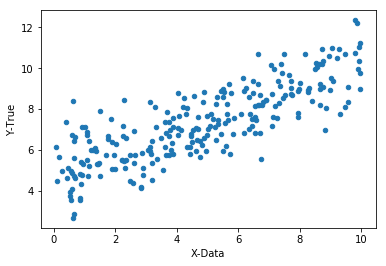

In [18]:
df.sample(250).plot(kind='scatter',x='X-Data',y='Y-True')

In [19]:
batch_size=10

In [20]:
m=tf.Variable(0.814)
b=tf.Variable(0.17)
# Two random numbers

In [21]:
xph=tf.placeholder(tf.float32,[batch_size])

In [22]:
yph=tf.placeholder(tf.float32,[batch_size])

In [23]:
y_model=m*xph+b

In [24]:
err=tf.reduce_sum(tf.square(yph-y_model))

In [25]:
optmz=tf.train.GradientDescentOptimizer(learning_rate=0.001)
train=optmz.minimize(err)

In [26]:
train

<tf.Operation 'GradientDescent' type=NoOp>

In [27]:
init=tf.global_variables_initializer()

In [28]:
with tf.Session() as sess:
    sess.run(init)
    batches=1000
    for i in range(batches):
        rand_ind=np.random.randint(len(x_data),size=batch_size)
        feed_dict={xph:x_data[rand_ind],yph:y_true[rand_ind]}
        sess.run(train,feed_dict=feed_dict)
    slope,intercept=sess.run([m,b])

In [29]:
slope

0.48602509

In [30]:
intercept

4.9795432

In [31]:
y_hat=x_data*slope+intercept

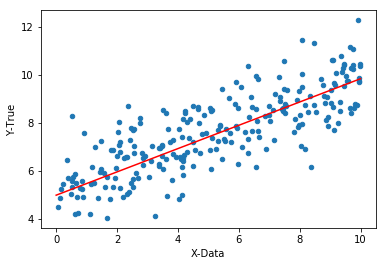

In [32]:
df.sample(250).plot(kind='scatter',x='X-Data',y='Y-True')
plt.plot(x_data,y_hat,'r')